In [350]:
import numpy as np
import matplotlib.pyplot as plt


In [351]:
#if you want just t or y in your function you must multiply your entire function of t or y by the missing valurable to the zeroth power

def dydt(y,t):

    return t + y

domain_start = -7
domain_end = 7

#try and find some functoin for num that will work for every domain size
num = 25

t_domain = np.linspace(domain_start,domain_end,num)

y_domain = np.linspace(domain_start,domain_end,num)


In [352]:
a = 0

def slope_finder(input_domain,output_domain,func):

    slope_list = []
    a = 0

    while a < len(input_domain):

        slope_value = func(input_domain,output_domain[a])

        slope_list.append(slope_value)
        
        a = a + 1

    slope_array = np.array(slope_list)
    return slope_array


slope_array = slope_finder(t_domain,y_domain,dydt)

In [353]:
#Get all x and y compontents of the slope

list = []

for a in range(0,len(t_domain)):

    for b in range (0,len(t_domain)):

        list.append(slope_array[a,b])

slope_array_graph = np.array(list)

t_comp = []
y_comp = []

for a in range (0,len(slope_array_graph)):

    theta = np.arctan(slope_array_graph[a])

    t_comp.append(np.cos(theta))
    y_comp.append(np.sin(theta))

print(slope_array_graph.shape)

t_comp = np.array(t_comp)
y_comp = np.array(y_comp)

print(t_comp.shape)
print(y_comp.shape)

(625,)
(625,)
(625,)


In [354]:
#y_domain

list = []

for x in range (0,num):

    list.append(y_domain)

list = np.array(list)

list_1 = []

for a in range(0,len(y_domain)):

    for b in range (0,len(y_domain)):

        list_1.append(list[a,b])

y_domain_graph = np.array(list_1)

#t_domain

list_2 = []

for a in range (0,num):

    intial = y_domain[a]

    b = 0
    while b < num: 

        list_2.append(intial)

        b = b + 1

t_domain_graph = np.array(list_2)


#print(y_domain_graph)
#print(t_domain_graph)


In [356]:
#Eulers method

def pos(t_old,y_old,delta_t,number_of_iterations):

    t_list = []
    y_list = []

    for a in range (0,number_of_iterations):

        t_list.append(t_old)
        y_new = y_old + dydt(y_old,t_old)*delta_t

        y_list.append(y_new)

        y_old = y_new
        t_old = t_old + delta_t

    return t_list, y_list


def tha_big_e(t_old,y_old,delta_t,number_of_iterations):


    t_list_1, y_list_1 = pos(t_old,y_old,delta_t,number_of_iterations)
    t_list_2, y_list_2 = pos(t_old,y_old,-delta_t,number_of_iterations)

    t_list_2.extend(t_list_1)
    y_list_2.extend(y_list_1)

    t_list_2 = np.array(t_list_2)
    y_list_2 = np.array(y_list_2)

    return t_list_2, y_list_2




70


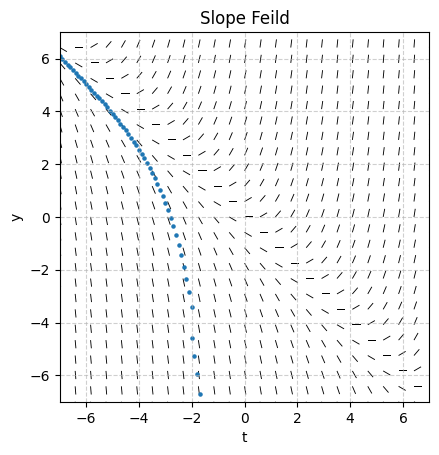

In [357]:

t_old = -2
y_old = -4

delta_t = 0.1
number_of_iteration = int(((domain_end - domain_start)/delta_t)/2)

print(number_of_iteration)

t_arr, y_arr = tha_big_e(t_old,y_old,delta_t,number_of_iteration)



def plot():
    fig, ax = plt.subplots()

    ax.set_xlim([domain_start, domain_end])
    ax.set_ylim([domain_start, domain_end])
    #ax.axhline(0, color='black', linewidth=1)
    #ax.axvline(0, color='black', linewidth=1)

    ax.grid(True, linestyle = '--', alpha = 0.6)

    ax.set_xlabel('t')
    ax.set_ylabel('y')

    ax.set_aspect('equal', adjustable='box')

    plt.title('Slope Feild')
    plt.quiver(t_domain_graph, y_domain_graph, t_comp, y_comp, color = 'black',headwidth=0, headlength=0, headaxislength=0)
    plt.scatter(t_arr,y_arr, s = 5)
plot()